In [9]:
import os
from glob import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from torch.utils.data import Dataset, DataLoader

import numpy as np
from PIL import Image

In [10]:
seed = 1

lr = 0.001
momentum = 0.5

batch_size = 64
test_batch_size = 64

epochs = 1
no_cuda = False
log_interval = 100

In [11]:
train_paths = glob('/Users/eunchankim/Desktop/dataset/cifar/train/*.png')
test_paths = glob('/Users/eunchankim/Desktop/dataset/cifar/test/*.png')

len(train_paths), len(test_paths)

(50000, 10000)

# Preprocess

In [12]:
class Dataset(Dataset):
    def __init__(self, data_paths, transform=None):

        self.data_paths = data_paths
        self.transform = transform

    def __len__(self):
        return len(self.data_paths)

    def __getitem__(self, idx):
        path = self.data_paths[idx]
        image = Image.open(path).convert("L")
        label = int(path.split('\\')[-2])
        
        if self.transform:
            image = self.transform(image)

        return image, label

In [13]:
data_loader = torch.utils.data.DataLoader(
    Dataset(train_paths, 
            transforms.Compose([
                transforms.RandomHorizontalFlip(), 
                transforms.ToTensor(), 
                transforms.Normalize(
                    mean=[0.406], 
                    std=[0.225])])
           ),
    batch_size=batch_size, 
    shuffle=True
)

# Understand Better

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
path = 'cat.png'

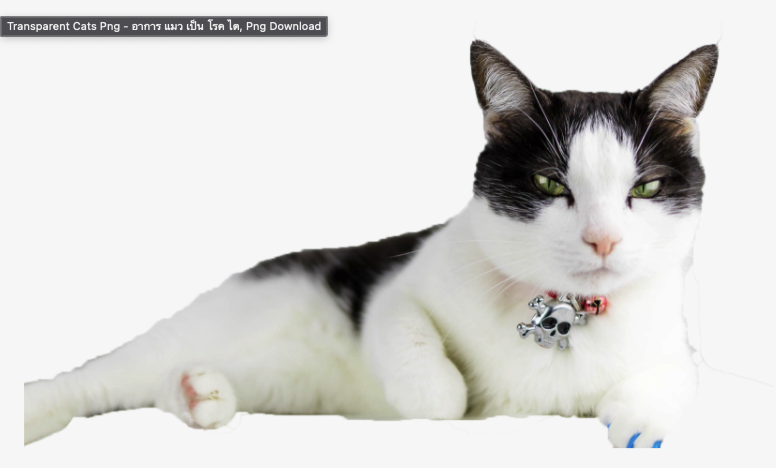

In [24]:
image = Image.open(path)
image

In [25]:
import torchvision

In [26]:
np.array(image).shape

(468, 776, 4)

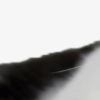

In [29]:
torchvision.transforms.CenterCrop(size=(100,100))(image)

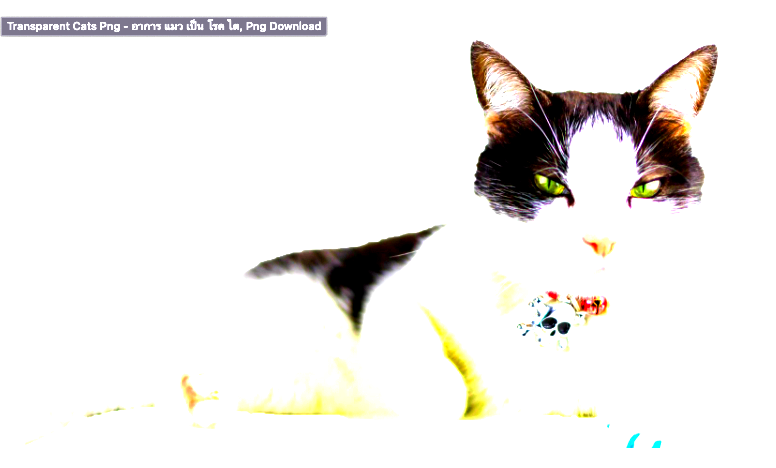

In [33]:
torchvision.transforms.ColorJitter(brightness=1, contrast=0.5, saturation=2, hue=0)(image)

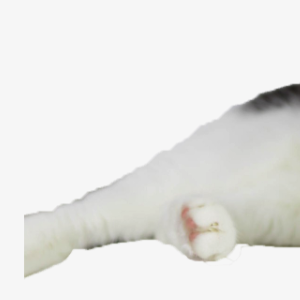

In [41]:
torchvision.transforms.FiveCrop(size=(300,300))(image)[2]

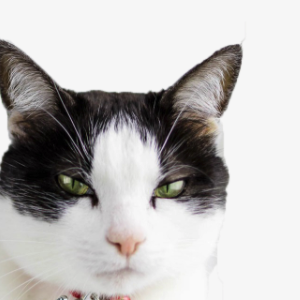

In [42]:
torchvision.transforms.FiveCrop(size=(300,300))(image)[1]

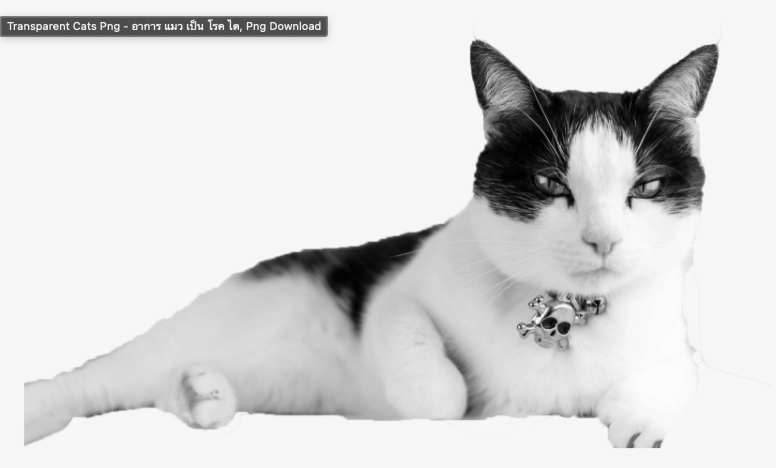

In [47]:
torchvision.transforms.Grayscale(num_output_channels=1)(image)

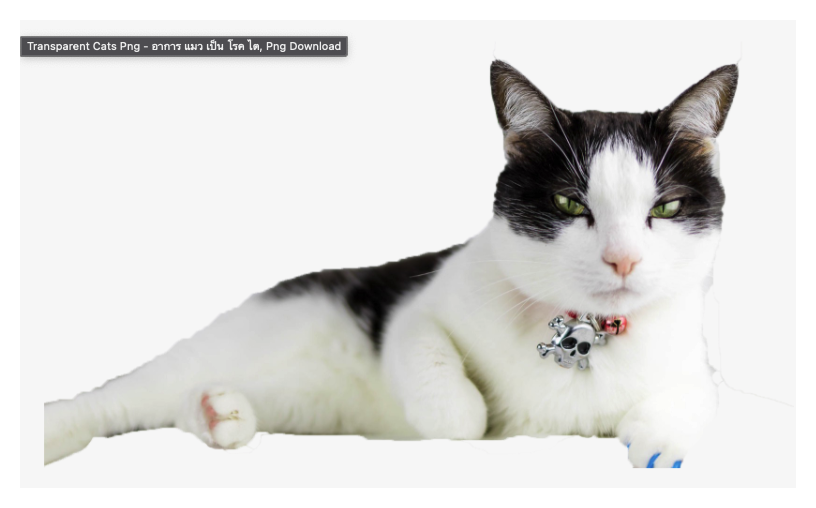

In [48]:
torchvision.transforms.Pad(padding=(20,20), fill=0, padding_mode='constant')(image)

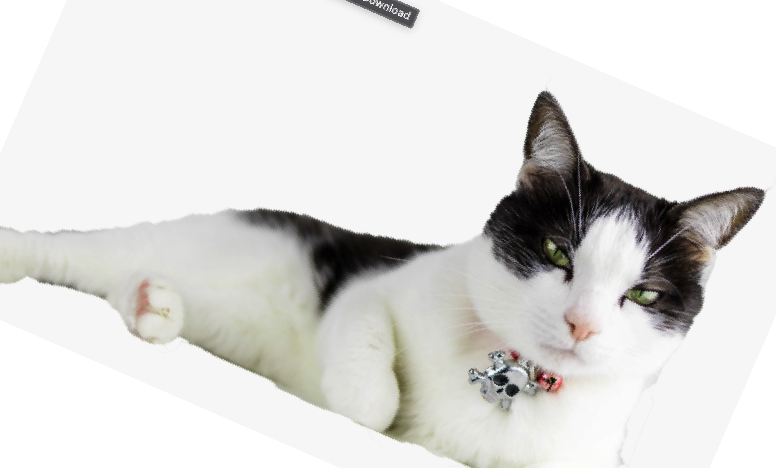

In [58]:
torchvision.transforms.RandomAffine(degrees=90, fillcolor=0)(image) #fillcolor 빈공간 색깔

In [59]:
transforms= [torchvision.transforms.Grayscale(num_output_channels=1),
             torchvision.transforms.Pad(padding=(20,20), fill=0, padding_mode='constant'),
             torchvision.transforms.RandomAffine(degrees=90, fillcolor=0)
            ]

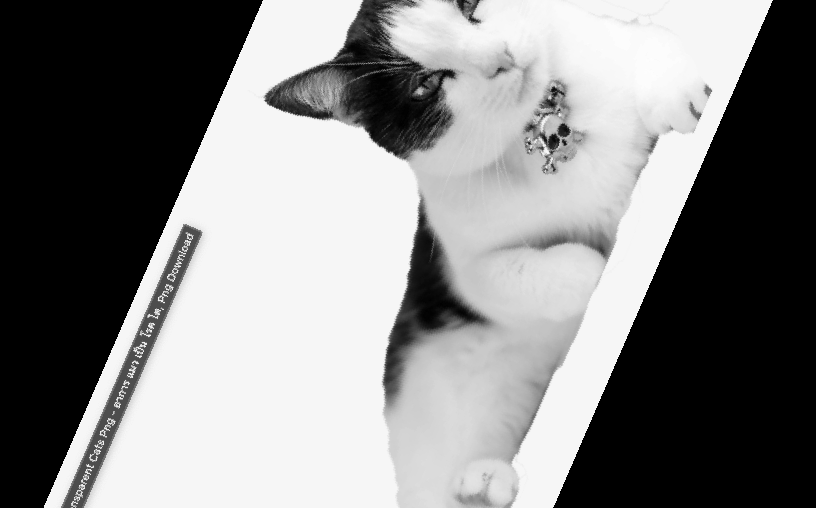

In [68]:
torchvision.transforms.RandomApply(transforms, p=0.5)(image)

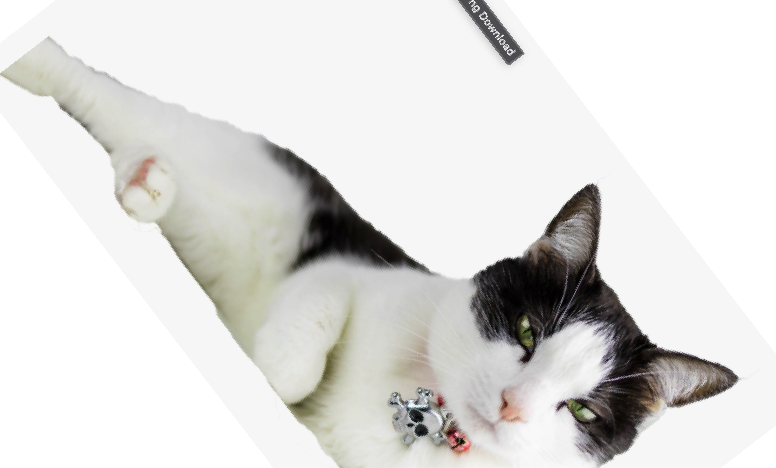

In [69]:
torchvision.transforms.RandomChoice(transforms)(image)

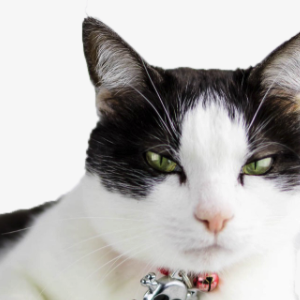

In [71]:
torchvision.transforms.RandomCrop(size=(300,300))(image)

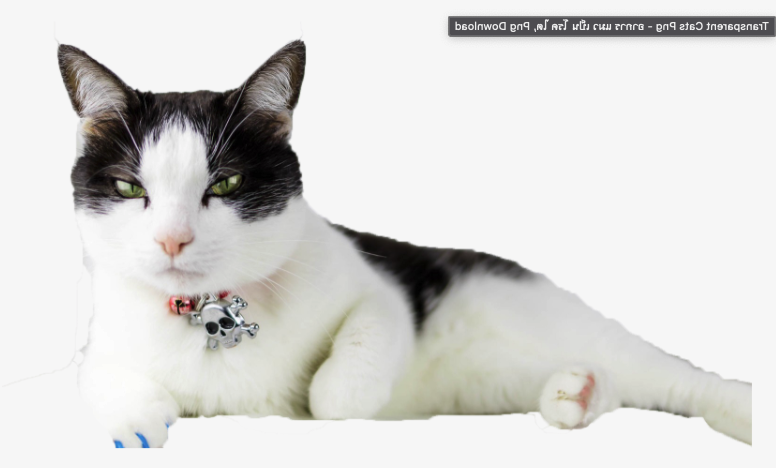

In [74]:
torchvision.transforms.RandomHorizontalFlip(p=0.5)(image)

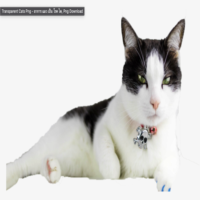

In [80]:
torchvision.transforms.Resize((200,200))(image)

In [81]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [88]:
np.array(image).shape

(468, 776, 4)

## Transform on Tensor

In [83]:
tensor = torchvision.transforms.ToTensor()(image)

In [85]:
tensor = torchvision.transforms.Normalize(mean=(0,0,0,0), std=(1,1,1,1))(tensor)